Vue 문법

# Basic Syntax - 01


## Template Syntax

### 개요

**Template Syntax**

DOM을 기본 구성 요소 인스턴스의 데이터에 선언적으로 바인딩할 수 있는(Vue instance와 DOM을 연결) HTML 기반 템플릿 구문을 사용(확장된 문법 제공)


**Template Syntax 종류**

1. Text Interpolation
   
   

    데이터 바인딩의 가장 기본적인 형태. 이중 중괄호 구문(콧수염 구문)을 사용
    콧수염 구문은 해당 구성 요소 인스턴스의 msg 속성 값으로 대체
    msg 속성이 변경될 때마다 업데이트 됨


2. Raw HTML
   
   
   
   

   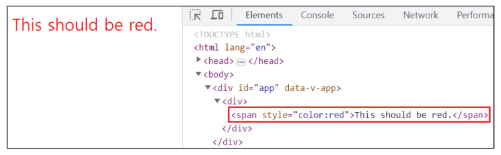

   콧수염 구문은 데이터를 일반 텍스트로 해석하기 때문에 실제 HTML을 출력하려면 v-html을 사용해야 함

   많이 사용되지는 않음. 이런 기능이 존재한다~


3. Attribute Bindings
   
   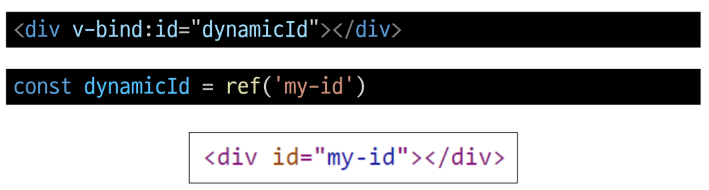

   콧수염 구문은 HTML 속성 내에서 사용할 수 없음--> v-bind 사용

   HTML의 id 속성 값을 vue의 dynamicId 속성과 동기화되도록 함
   
   바인딩 값이 null이나 undefined인 경우 렌더링 요소에서 제거됨

   요소의 id 값을 반응형 변수로 넣는 ~ 바인딩한다.


4. JavaScript Expressions

   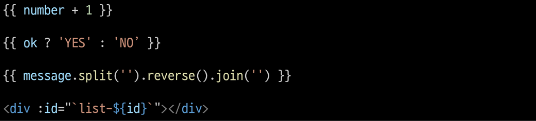

   - Vue는 모든 데이터 바인딩 내에서 JavaScript 표현식의 모든 기능을 지원

   - Vue 템플릿에서 모든 JavaScript 표현식을 사용할 수 있는 위치
      
      1. 콧수염 구문 내부
      2. 모든 directive의 속성 값(v-로 시작하는 특수 속성)

   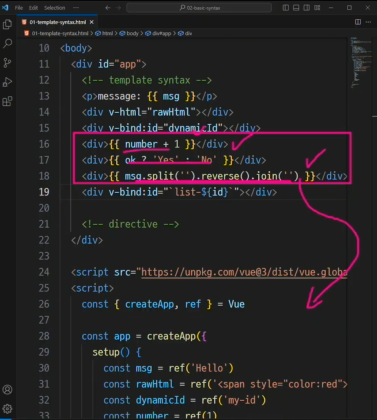

   웬만해선 vue instance에서 처리하고 출력하도록.

**Expressions 주의사항**

- 각 바인딩에는 하나의 단일 표현식만 포함될 수 있음

   : 표현식 값으로 평가할 수 있는 코드 조각 (return 뒤에 사용할 수 있는 코드여야 함)

- 작동하지 않는 경우

   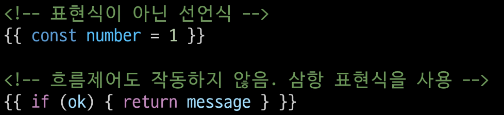


### Directive

**Directive**
: "-v" 접두사가 있는 특수 속성


**Directive 특징**

   - Directive의 속성 JavaSript 표현식이어야 함 (v-for, v-on 제외)

   - 표현식 값 변경될 때 DOM에 반응적으로 업데이트 적용
   
   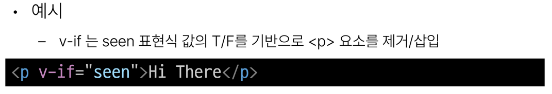


**Directive 전체 구문**

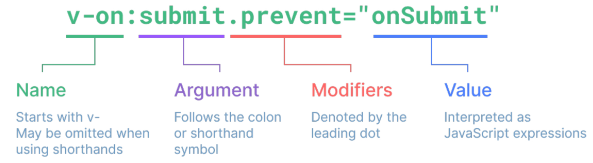

```
v-on : submit.prevent="onSubmit"

directive는 인자와 modifier라는 수식어로 옵션 가능
directive : (argument)
modifier는 있는것도 없는것도 있음
v-bind: id와 같은 인자들 / v-on: event
--> v-on: submit event가 발생할 때 event를 prevent 하겠다?
```


**Directive - Arguments**

- 일부 directive는 directive 뒤에 콜론(:)으로 표시되는 인자를 사용할 수 있음

- 예시

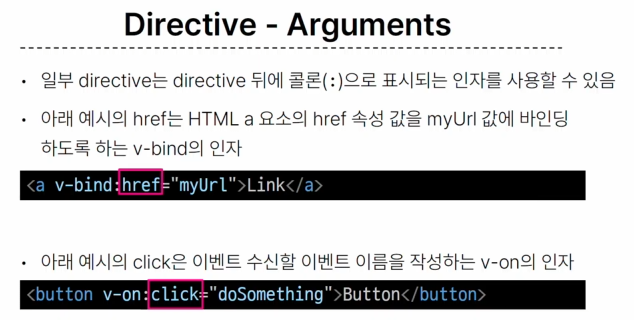


**Directive - Modifiers**

- .(dot)로 표시되는 특수 접미사로, directive가 특별한 방식으로 바인딩되어야 함을 나타냄

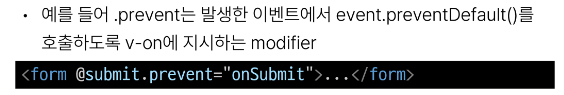

modifier는 chaining이 가능함. 


**Built-in Directives**

https://vuejs.org/api/built-in-directives.html



In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>

</head>

<body>
  <div id="app">
    <!-- template syntax -->
    <p> message : {{msg}} </p>
    <!-- div의 자식 속성으로 들어가는 것을 확인할 수 있음 -->
    <div v-html="rawHtml"></div>
    <div v-bind:id="dynamicId"></div>
    <div>{{number + 1}} </div>
    <div>{{ ok ? "YES" : "NO" }} </div>
    <div>{{msg.split("").reverse().join("")}} </div>
    <div v-bind:id="`list-${id}`"></div>
    

    <!-- directive -->
    <!-- seen 값이 null이 되면 랜더링도 안함. -->
    <p v-if="seen">Hello</p>
    <a v-bind:href="myUrl">Link</a>
    <p><button v-on:click="doSomething">버튼</button></p>
    <form v-on:submit.prevent="onSubmit">
      <input type="submit">
    </form>


  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const msg = ref('Hello')
        // JS에서는 span tag, inline style 적용되어 있는 단순 문자열. 
        const rawHtml = ref('<span style="color:red">This should be red.</span>')
        // v-vind 바인딩 값이 null이나 undefined인 경우 렌더링 요소에서 제거됨
        const dynamicId = ref('my-id')
        const number = ref(1)
        const ok = ref(false)
        const seen = ref(true)
        const id = ref(100)
        const myUrl = 'https://www.google.co.kr/'
        const doSomething = function () {
          console.log('button clicked')
        }
        const onSubmit = function () {
          console.log('form submitted')
        }
        return {
          msg,
          rawHtml,
          dynamicId,
          seen,
          number,
          ok,
          id,
          myUrl,
          doSomething,
          onSubmit
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## Dynamically data binding

**v-bind**

하나 이상의 속성 또는 컴포넌트 데이터를 표현식에 동적으로 바인딩

**v-bind 사용처**

1. Attribute Bindings

2. Class and Style Bindings


**Attribute Bindings**

- HTML의 속성 값을 Vue의 상태 속성 값과 동기화 되도록 함. :으로 축약 가능.

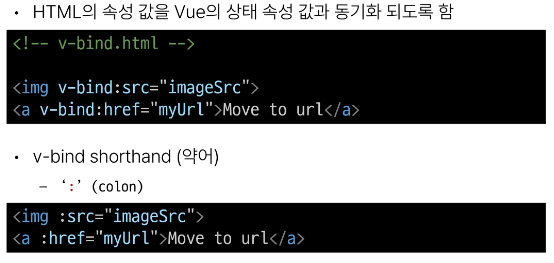

- Dynamic attribute name (동적 인자 이름)

    대괄호로 감싸서 directive argument에 JavaScript 표현식을 사용할 수도 있음

    JavaScript 표현식에 따라 동적으로 평가된 값이 최종 argument 값으로 사용됨

    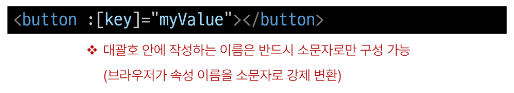

- 예시

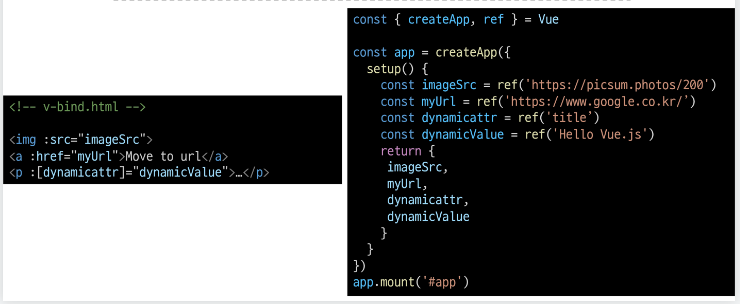

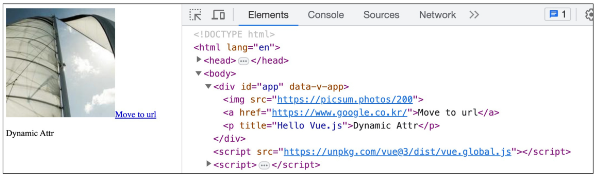



In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <img v-bind:src="imageSrc" alt="">
    <a v-bind:href="myUrl">sdasd</a>
    <!-- v-bind는 생략 가능.  -->
    <img :src="imageSrc" alt="">
    <a :href="myUrl">sdasd</a>

    <p :[dynamicattr]="dynamicValue">......</p>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const imageSrc = ref('https://picsum.photos/200/')
        const myUrl = ref('https://www.google.co.kr/')
        // []안의 값은 camelCase X. 소문자로만 작성
        const dynamicattr = ref("title")
        const dynamicValue = ref("Hello")
         return {
          imageSrc,
          myUrl,
          dynamicattr,
          dynamicValue
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


### Class and style Bindings

    - 클래스와 스타일은 모두 속성이므로 v-bind를 사용해 다른 속성과 마찬가지로 동적으로 문자열 값을 할당할 수 있음

    - 그러나 단순히 문자열 연결을 사용하여 이러한 값을 생성하는 것은 번거롭고 오류가 발생하기 쉬움

    - Vue는 클래스 및 스타일과 함께 v-bind를 사용할 때 객체 또는 배열을 활용한 개선 사항을 제공


**Class and Style Bindings가 가능한 경우**

1. Binding HTML Classes

   1.1 binding to Objects 

      - 반드시 inline 방식으로 작성하지 않아도 됨

      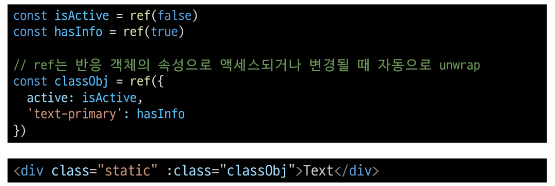

   1.2 Binding to Arrays

   :class 를 배열에 바인딩해 클래스 목록을 적용할 수 있음

   배열 구문 내에서 객체 구문 사용

2. Binding Inline Styles

   2.1 Binding to Objects 
   
   :style은 JavaScript객체 값에 대한 바인딩을 지원(HTML style 속성에 해당)
   
   실제 CSS에서 사용하는 것처럼 kebab-cased 키 문자열도 지원(camelCase 작성 권장)
   
   깔끔한 작성을 위해서는 스타일 객체에 직접 바인딩하는 것을 권장함

   
   2.2 Binding to Arrays

   여러 스타일 객체의 배열에 :style을 바인딩 할 수 있음. 작성한 객체는 병합되어 동일한 요소에 적용됨.


In [ ]:
<!-- 클래스 바인딩- 객체 바인딩, 배열 바인딩 -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
  <style>
    .active {
      color: crimson;
    }

    .text-primary {
      color: blue;
    }
  </style>
</head>

<body>
  <div id="app">
    <!-- Binding to Objects -->
    <div :class="{ active : isActive }">Text</div>
    <div class="static" :class="{ active : isActive, 'text-primary' : hasInfo }">Text</div>
    <div class="static" :class="classObj">Text</div>

    <!-- Binding to Arrays -->
    <div :class="[activeClass, infoClass]">Text</div>
    <div :class="[{active: isActive}, infoClass]">Text</div>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const isActive = ref(true)
        const hasInfo = ref(true)
        const classObj = {
          active : isActive, 
          'text-primary' : hasInfo
        }
        const activeClass = ref("active")
        const infoClass = ref("text-primary")
        return {
          isActive,
          hasInfo,
          classObj,
          activeClass,
          infoClass
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


In [ ]:
<!-- 스타일 바인딩- 객체 바인딩, 배열 바인딩 -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- Binding to Objects -->
    <div :style="{color : activeColor, fontSize : fontSize + 'px'}">Text</div>
    <div :style="{'font-size':fontSize+'px'}">Text</div>
    <div :style="styleObj">Text</div>
    <!-- Binding to Arrays -->
    <div :style="[styleObj, styleObj2]">Text</div>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const activeColor = ref("crimson")
        const fontSize = ref(50)
        const styleObj = ref({
          color : activeColor,
          // fonrSize: fontSize + "pk" 적용안됨-> 반응형 변수가 다른 반응형 객체의 속성값으로 들어갈 때는 auto unwrap이 됨. 
          //fonsize가 auto unwrap이 되려면 그 객체가 최종 결과물이 되어야 함.
          // activeColor는 최종 평가물이기 때문에 auto unwrap이 되는 것
          // 
          fontSize : fontSize.value + 'px'
        })
        const styleObj2 = ref({
          color : "blue",
          border : "1px solid black"
        })
        return {
          activeColor,
          fontSize,
          styleObj,
          styleObj2
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## Event Handling

**v-on**

DOM 요소에 이벤트 리스너를 연결 및 수신

**v-on 구성**
```
v-on:event="handler"
@event="handler"
```
- handler 종류
  1. inline handlers : 이벤트가 트리거 될 때 실행 될 JS code
    
    주로 간단한 상황에 사용함. 

  2. Method handlers : 컴포넌트에 정의된 메서드 이름

    inline handler로는 불가능한 대부분의 상황에서 사용
    
    method handler는 이를 트리거하는 기본 DOM event 객체를 자동으로 수신.

    메서드 이름에 직접 바인딩하는 대신 inline handler에서 메서드를 호출할 수도 있음(기본 이벤트 대신 사용자 지정 인자를 전달할 수 있음)


**inline handler에서의 event 인자에 접근하기**

inline handler에서 원래 DOM 이벤트에 접근하기
"$event" 변수를 사용하여 메서드에 전달. --> 아래 실습코드 참고


**Event Modifiers**

- stop, prevent, self 등 다양한 modifiers 제공함.
- DOM 이벤트에 대한 처리보다는 데이터에 관한 논리를 작성하는 것에 집중.
  
```
<form @submit.prevent="onSubmit">...</form>
<a @click.stop.prevent="onClick">...</a>
```

modifier는 chained 되게끔 작성할 수 있으며 작성된 순서로 실행되기 때문에 작성 순서에 유의!

**Key modifier**

Vue는 keyboard event를 수신할 때 특정 키에 관한 별도 modifier를 사용할 수 있음.
```
<input @keyUp.enter="onSubmit">
```

keyboard event -> MDN
https://developer.mozilla.org/ko/docs/Web/API/KeyboardEvent


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- Inline Handlers -->
    <button v-on:click="count++">Add 1</button>
    <p>Count: {{ count }}</p>

    <!-- Method Handlers -->
    <button @:click="myFunc">Hello</button>
    <!-- v-on에서 발생한 event가 myFunc의 첫 번째 인자로 전달됨 -->

    <!-- Calling Methods in Inline Handlers -->
    <!-- 기본 이벤트 대신 사용자 지정 인자를 전달할 수 있음 -->
    <button @:click="greeting('Hello')">Say hello</button>
    <button @:click="greeting('bye')">Say bye</button>

    <!-- Accessing Event Argument in Inline Handlers -->
    <!-- inline handler에서의 event 인자에 접근하기 -->
    <!-- $를 붙이면 event 객체를 첫번째가 아닌 순서에 받을 수 있음 -->
    <button @:click="warning('경고', $event)">Submit</button>

    <!-- event modifiers -->
    <form @submit.prevent="onSubmit">
      <input type="submit">
    </form>
    <a @click:stop.prevent="onLink">Link</a>
    <!-- 작성한 순서대로 실행되기 때문에 modifire 작성 시 주의 -->

    <!-- key modifiers -->
    <input type="text" @keyUp.enter="onSubmit">
    <!-- keyboard event 에 대한건 mdn에서 봐야 함 -->
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const count = ref(0)
        const name= ref("Alice")
        const myFunc = function (event){
          console.log(event)
          console.log(event.currentTarget)
          console.log(`hello, ${name.value}`)
        }
        const greeting = function (message){
          console.log(message)
        }
        const warning = function (message, event){
          console.log(message)
          console.log(event)
        }
        const onSubmit = function (event) {
          console.log(event)
        }
        return {
          count,
          name,
          myFunc,
          greeting,
          warning,
          onSubmit
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## Form Input Bindings

form을 처리할 때 사용자가 input에 입력하는 값을 실시간으로 JavaScript 상태에 동기화해야 하는 경우(양방향 바인딩)

1. v-bind와 v-on 사용
   
   v-on을 사용하여 input 이벤트가 발생할 때마다 input 요소의 value 값을 별도 반응형 변수에 저장하는 핸들러 호출, v-bind로 input 요소의 value 속성 값을 입력값으로 사용함


2. v-model

    form input 요소 또는 컴포넌트에서 양방향 바인딩을 만듦

    v-model을 사용하여 사용자 입력 데이터와 반응형 변수를 실시간으로 동기화.

https://vuejs.org/api/built-in-directives.html#v-model

https://vuejs.org/guide/essentials/forms.html#multiline-text

vue docs 볼 때 composition 옵션 선택하고 보기!


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <p> {{inputText1}} </p>
    <input type="text" @input="onInput" :value ="inputText1">

    <!-- 영어 외의 언어는 조금 동작이 어색하다. 한글은 위의 방법을 이용히는 수빆에 없음 -->
    <p> {{inputText2}} </p>
    <input type="text" v-model="inputText2">
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        // 사용자의 입력을 실시간으로 저장할 반응형 변수
        const inputText1 = ref("")
        const inputText2 = ref("")
        const onInput = function (event){
          inputText1.value = event.currentTarget.value
        }
        return {
          inputText1,
          onInput,
          inputText2
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


In [ ]:
<!-- v-model -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- single checkbox -->
    <input type="checkbox" id="checkbox" v-model="checked">
    <label for="checkbox"> {{checked}} </label>

    <!-- multiple checkbox -->
    <div>Checked names: {{checkedNames}} </div>
    <!-- value값을 지정하면 다양한 값을 true false외로 저장 가능 -->
    <input type="checkbox" id="alice" value="Alice" v-model="checkedNames">
    <label for="alice">Alice</label>

    <input type="checkbox" id="bella" value="Bella" v-model="checkedNames">
    <label for="bella">Bella</label>

    <!-- single select -->
    <div>Selected: {{selected}} </div>

    <select v-model="selected">
      <!-- select의 option은 값 자체가 value로 들어감 -->
      <!--  이 값을 쓰기 싫으면 option에 value= 값 지정. -->
      <option disabled value="">Please select one</option>
      <option>Alice</option>
      <option>Bella</option>
      <option>Cathy</option>
    </select>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        const checked = ref(false)
        const checkedNames = ref([])
        const selected = ref([])
        return {
          checked,
          checkedNames,
          selected
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>
